In [1]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 91%|██████████████████████████████████▋   | 48.0M/52.6M [00:00<00:00, 60.5MB/s]
100%|██████████████████████████████████████| 52.6M/52.6M [00:00<00:00, 59.8MB/s]


Toxic Comment Classification Challenge

https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/submissions

In [8]:
!cp kaggle.json ~/.kaggle/

In [10]:
!chmod 600 /Users/alicesum/.kaggle/kaggle.json

The goal of this project is building a model that can input a text and predict it is toxic or not.

We can see this is an NLP text, and the text can be categorized into different groups to see the type of toxic text. As a result, this can be an unsupervised problem, which can be addressed using an unsupervised method.

In [2]:
import zipfile
import os
!mkdir "data2"
!mkdir "data2/toxic"
zip_path = 'jigsaw-toxic-comment-classification-challenge.zip'
extract_path = 'data2/toxic'  # Optional: Specify a target directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extracts to the specified path

In [3]:
!pip install pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data2/toxic/train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [99]:
train_df = pd.read_csv('data2/toxic/train.csv')
test_df = pd.read_csv('data2/toxic/test.csv')
labels_df = pd.read_csv('data2/toxic/test_labels.csv')

In [100]:
from collections import namedtuple

Data = namedtuple('Data', ['labels','train','test'])
data = Data(labels_df, train_df, test_df)

In [101]:
print("Labels Info:")
print(data.labels.head())
print("\nTrain Info:")
print(data.train.head())
print("\nTest Info:")
print(data.test.head())

Labels Info:
                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  

Train Info:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my he

In [102]:
import pandas as pd

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer


Extracting word features and show Exploratory Data Analysis (EDA) 

We can see the dataset has 3 columns. They are articled, text, and category.

I will remove the Articled for the train as it is useless because it is not related to the text.

In [104]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


We can see both of the training set and testing set have no null value. 

In [216]:
data.train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [218]:
data.test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [105]:
categories = df['toxic'].unique()

In [106]:
categories

array([0, 1])

In [107]:
topics = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [ ]:
for t in topics:
    print 

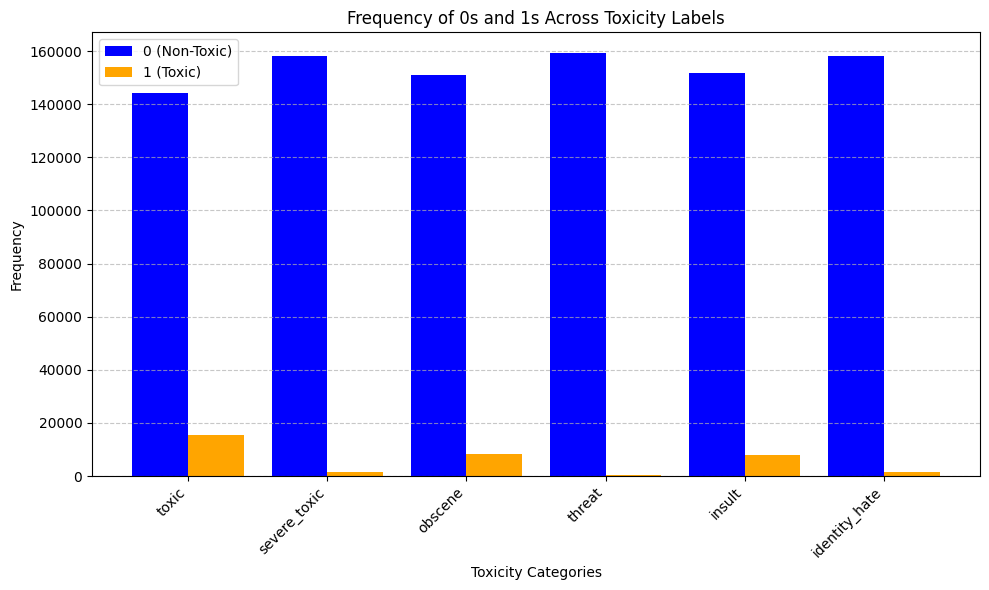

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each column's 0s and 1s
for i, col in enumerate(topics):
    counts = df[col].value_counts().sort_index()
    plt.bar(i - 0.2, counts.get(0, 0), width=0.4, color='blue', label='0 (Non-Toxic)' if i == 0 else "")
    plt.bar(i + 0.2, counts.get(1, 0), width=0.4, color='orange', label='1 (Toxic)' if i == 0 else "")

# Customize plot
plt.xticks(range(len(topics)), topics, rotation=45, ha='right')
plt.xlabel('Toxicity Categories')
plt.ylabel('Frequency')
plt.title('Frequency of 0s and 1s Across Toxicity Labels')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This is interesting. We can see the dataset is mostly focus on people with obscene and insult is the second.

In [109]:
df[topics]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [110]:
y = df[topics].to_numpy()

In [111]:
y.shape

(159571, 6)

In [112]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import Normalizer

Models:
In below, we will use NMF method and the XGBoost method.
As usual, we split the training set into the test set(or we should call validation set) and the training set.

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline

def nmf_pipeline(max_features=1000, max_components=10):
    """Creates a pipeline that automatically handles NMF initialization"""
    tfidf = TfidfVectorizer(
        stop_words='english',
        max_features=max_features,
        min_df=2,
        max_df=0.8
    )
    
    # First transform to get dimensions
    temp_pipe = Pipeline([('tfidf', tfidf)])
    X_temp = temp_pipe.fit_transform(df['comment_text'])
    
    # Calculate safe number of components
    n_samples, n_features = X_temp.shape
    n_components = min(max_components, n_samples, n_features)
    print(f'suggested n_components: {n_components}')
    # Choose initialization method
    init_method = 'nndsvd' if n_components <= min(n_samples, n_features) else 'random'
    
    p =Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,          # Limit vocabulary size
        sublinear_tf=True,           # Smooth term frequencies
        min_df=5,                    # Ignore rare words
        max_df=0.95,                 # Ignore overly common words
        stop_words='english'         # Remove stopwords
    )),
    
    ('normalizer', Normalizer()),    # Scale features without breaking sparsity
    
    ('nmf', NMF(
        n_components=n_components,             # Reduced dimensions
        init='nndsvda',              # Better zero handling
        solver='mu',                 # Multiplicative update
        beta_loss='kullback-leibler', # More suitable for text
        random_state=42,
        max_iter=200
    )),
    
    ('clf', OneVsRestClassifier(
        LogisticRegression(
            solver='saga',           # Handles sparse data better
            penalty='l1',            # Works well with text features
            C=0.5,                  # Stronger regularization
            max_iter=500,
            random_state=42
        )
    ))
    ])
    return p
# Create safe pipeline
pipeline = nmf_pipeline(max_components=5)

suggested n_components: 5


In [115]:
df = data.train

In [116]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [117]:
categories

array([0, 1])

In [118]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Building and training models, and split it

In [119]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['comment_text'], y, test_size=0.25, random_state=42
)

Building and training models. 

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

# Stable text classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,          # Reduced vocabulary size
        min_df=10,                  # Filter rare terms
        max_df=0.8,                # Filter overly common terms
        ngram_range=(1, 2),        # Include bigrams
        sublinear_tf=True,          # Smooth term frequencies
        stop_words='english'        # Remove stopwords
    )),
    ('normalizer', Normalizer(norm='l2')),  # Essential for stability
    ('clf', OneVsRestClassifier(
        SGDClassifier(
            loss='log_loss',        # Correct loss function
            penalty='l2',           # More stable than l1
            alpha=1e-4,             # Regularization strength
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=5,
            random_state=42,
            class_weight='balanced'  # Handle imbalanced classes
        )
    ))
])

# Training with stability checks
try:
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    print(f"Train accuracy: {train_score:.4f}")
    print(f"Test accuracy: {test_score:.4f}")
except Exception as e:
    print(f"Training failed: {str(e)}")

Train accuracy: 0.8534
Test accuracy: 0.8481


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, roc_curve, auc, 
                            accuracy_score, classification_report)

In [122]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Accuracy: 0.8481



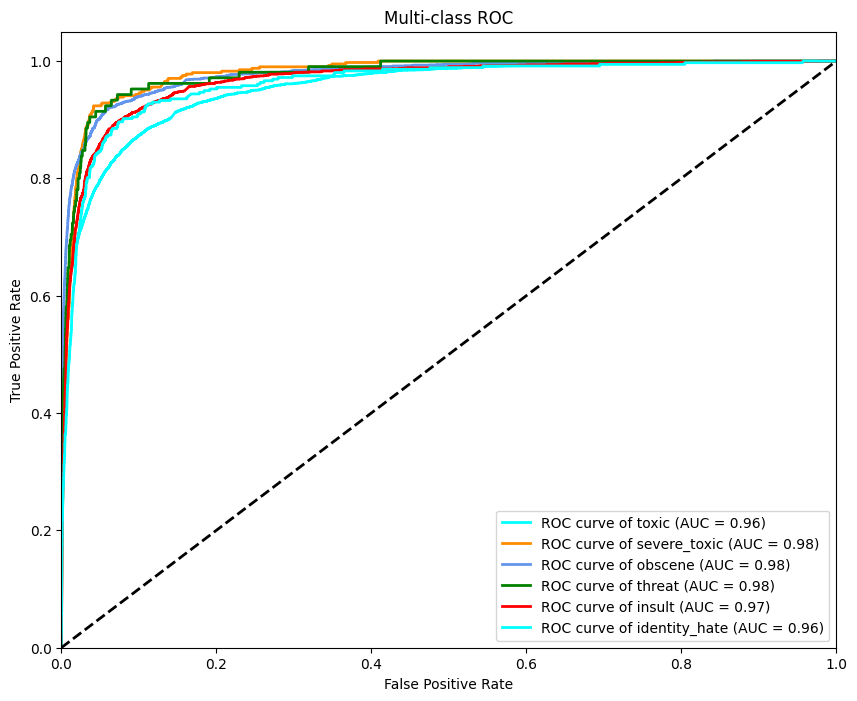

               precision    recall  f1-score   support

        toxic       0.56      0.83      0.67      3815
 severe_toxic       0.22      0.89      0.36       406
      obscene       0.62      0.86      0.72      2143
       threat       0.08      0.80      0.15       105
       insult       0.49      0.85      0.62      2011
identity_hate       0.14      0.84      0.25       357

    micro avg       0.44      0.85      0.58      8837
    macro avg       0.35      0.85      0.46      8837
 weighted avg       0.52      0.85      0.63      8837
  samples avg       0.05      0.08      0.06      8837



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from itertools import cycle

# 1. Calculate accuracy
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# 2. Confusion Matrix (for each class)
classes = topics


# 3. ROC Curve
# Compute ROC curve and ROC area for each class
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get predicted probabilities
y_score = pipeline.predict_proba(X_test)

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for i, color in zip(range(6), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of {classes[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

# 4. Classification Report
print(classification_report(y_test, y_pred, target_names=classes))

We can see it is very diffcult to identity hate with the unsupervisor method(NMF).

In [221]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
accuracy_tr = accuracy_score(y_train, y_pred_train)
accuracy_te = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {accuracy_tr:.4f}\n")
print(f"Test Accuracy: {accuracy_te:.4f}\n")

Train Accuracy: 0.8534

Test Accuracy: 0.8481



In [230]:
y_pred_test.shape

(39893, 6)

In [232]:
y_pred_test[:,1:].shape

(39893, 5)

<Figure size 1200x1000 with 0 Axes>

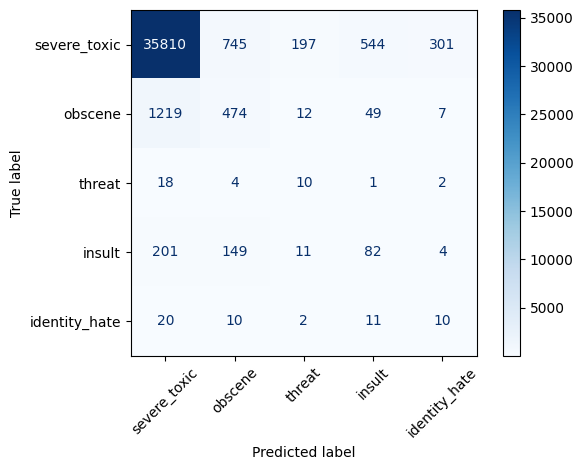

In [233]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test[:,1:].argmax(axis=1), y_pred_test[:,1:].argmax(axis=1))
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(cm, display_labels=topics[1:])
disp.plot(cmap='Blues', xticks_rotation=45)  # You can use xticks_rotation parameter directly
plt.tight_layout()
plt.show()

Since both test and training accuracy for unsupervisor and supervisor models are very close, so I can assume they don't have overfitting issue.
I also splited the dataset like 25% for the testing(or validation here).

Now,let's use the supervisor method for the kaggle competition to compareits performance to different algorithms.  

In [129]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [130]:
df[topics]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [131]:
topics

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [132]:
import pandas as pd

def process_data_with_ids(pipeline, new_df, text_column='comment_text', id_column='id'):
    """
    Process new DataFrame and return only id, Text, and PredictedLabel.
    
    Args:
        pipeline: Trained sklearn pipeline
        new_df: DataFrame containing text data and article IDs
        text_column: Name of text column (default: 'comment_text')
        id_column: Name of ID column (default: 'id')
    
    Returns:
        DataFrame with columns: id, Text, PredictedLabel
    """

    # Extract texts and IDs
    texts = new_df[text_column].values
    article_ids = new_df[id_column].values
    
    # Get predicted labels (directly as strings if possible)
    predicted_labels = pipeline.predict(texts)
    
    labels = topics

    columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    df_pred = pd.DataFrame(predicted_labels, columns=columns)

    # Create simplified results DataFrame
    results = pd.DataFrame({
        'id': article_ids,
    })
    
    return pd.concat([results, df_pred], axis=1)


In [133]:
data.test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [148]:
results_df = process_data_with_ids(pipeline, data.test)

In [149]:
results_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,1,1,1,1,1,1
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,1,0,1,0,0,0
153160,fffd7a9a6eb32c16,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,0,0,0,0,0,0
153162,fffe8f1340a79fc2,0,0,0,0,0,1


In [150]:
results_df.to_csv('output5v1.csv', index=False)

Section 2

It looks like 1.2859 is still too high compairing to the one we got from the week3.

In [86]:
X_train, X_test, y_train, y_test 

(75144     ,  I have added the newline sign back in, you ...
 154769    Don't worry, I think I fixed it. But still loo...
 48346     "\nWell it seems to me that you have a problem...
 72576     Contents\nThe contents box just appears when t...
 79974     " \n\n(Btw., did you know the article links to...
                                 ...                        
 119879    REDIRECT Talk:John Loveday (experimental physi...
 103694    Back it up. Post the line here with the refere...
 131932    I won't stop that. Sometimes Germanic equals G...
 146867    "\n\n British Bands?  \n\nI think you've mista...
 121958    You are WRONG. \n\nJustin Thompson is mentione...
 Name: comment_text, Length: 119678, dtype: object,
 119105    Geez, are you forgetful!  We've already discus...
 131631    Carioca RFA \n\nThanks for your support on my ...
 125326    "\n\n Birthday \n\nNo worries, It's what I do ...
 111256    Pseudoscience category? \n\nI'm assuming that ...
 83590     (and if such phrase ex

In [88]:
X_train, y_train

(75144     ,  I have added the newline sign back in, you ...
 154769    Don't worry, I think I fixed it. But still loo...
 48346     "\nWell it seems to me that you have a problem...
 72576     Contents\nThe contents box just appears when t...
 79974     " \n\n(Btw., did you know the article links to...
                                 ...                        
 119879    REDIRECT Talk:John Loveday (experimental physi...
 103694    Back it up. Post the line here with the refere...
 131932    I won't stop that. Sometimes Germanic equals G...
 146867    "\n\n British Bands?  \n\nI think you've mista...
 121958    You are WRONG. \n\nJustin Thompson is mentione...
 Name: comment_text, Length: 119678, dtype: object,
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], shape=(119678, 6)))

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

# Train XGBoost (multi-label)
model = MultiOutputClassifier(XGBClassifier(n_estimators=100, learning_rate=0.1))
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_train_tfidf)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65     11479
           1       0.89      0.31      0.46      1189
           2       0.94      0.67      0.78      6306
           3       0.93      0.37      0.53       373
           4       0.87      0.54      0.67      5866
           5       0.89      0.31      0.46      1048

   micro avg       0.93      0.53      0.67     26261
   macro avg       0.92      0.45      0.59     26261
weighted avg       0.93      0.53      0.67     26261
 samples avg       0.05      0.04      0.04     26261



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [234]:
X_test_tfidf = tfidf.transform(X_test) 

In [235]:
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)

In [236]:
y_test.shape, X_test.shape

((39893, 6), (39893,))

In [237]:
accuracy_tr = accuracy_score(y_train, y_pred_train)
accuracy_te = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {accuracy_tr:.4f}\n")
print(f"Test Accuracy: {accuracy_te:.4f}\n")

Train Accuracy: 0.9237

Test Accuracy: 0.9149



In [241]:
y_pred = model.predict(X_train_tfidf)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.47      0.63      3815
           1       0.54      0.16      0.25       406
           2       0.89      0.63      0.74      2143
           3       0.63      0.21      0.31       105
           4       0.81      0.48      0.61      2011
           5       0.58      0.16      0.25       357

   micro avg       0.87      0.48      0.62      8837
   macro avg       0.73      0.35      0.46      8837
weighted avg       0.86      0.48      0.61      8837
 samples avg       0.04      0.04      0.04      8837



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x1000 with 0 Axes>

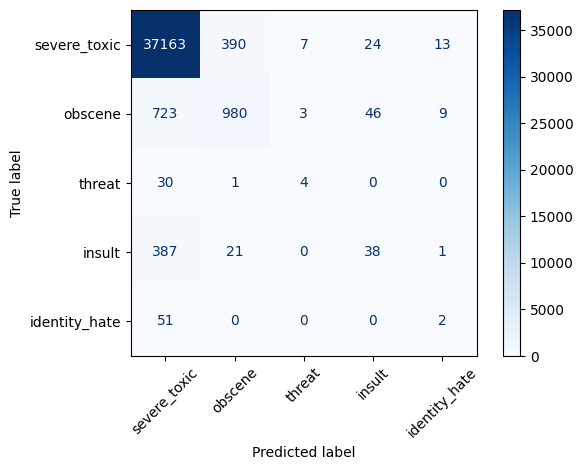

In [242]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test[:,1:].argmax(axis=1), y_pred_test[:,1:].argmax(axis=1))
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(cm, display_labels=topics[1:])
disp.plot(cmap='Blues', xticks_rotation=45)  # You can use xticks_rotation parameter directly
plt.tight_layout()
plt.show()

In [244]:
data.test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [206]:
df_t = data.test

In [207]:
X_new_tfidf = tfidf.transform(df_t ['comment_text']) 

In [208]:
y_test_pred = model.predict(X_new_tfidf)

In [209]:
topics

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [210]:
pred_df = pd.DataFrame(y_test_pred, columns=[f"{topics[i]}" for i in range(len(topics))])
output_df = pd.concat([df_t['id'], pred_df], axis=1)  # Bind new IDs to predictions
output_df.to_csv('outputx1.csv', index=False)
print("saved to 'outputx1.csv'")

saved to 'outputx1.csv'


In Conclusion, it looks like supervisor method way better with accuracy around 90% compairing to the unsupervisored method around 80%.